<a href="https://colab.research.google.com/github/rezakhanahmadi342341/housing.csv/blob/main/BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 190s 796ms/step - accuracy: 0.8757 - loss: 0.4044 - val_accuracy: 0.8801 - val_loss: 1.0143
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 195s 766ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.9874 - val_loss: 0.0745
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 203s 770ms/step - accuracy: 0.9888 - loss: 0.0359 - val_accuracy: 0.9854 - val_loss: 0.0482
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 202s 771ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9908 - val_loss: 0.0321
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 181s 771ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9887 - val_loss: 0.0372
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 182s 775ms/step - accuracy: 0.9947 - loss: 0.0171 - val_accuracy: 0.9897 - val_loss: 0.0326
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 202s 773ms/step - accuracy: 0.9959 - loss: 0.0122 - val_accuracy: 0.9930 - val_loss: 0.0239
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 201s 770ms/step - accuracy: 0.9956 -

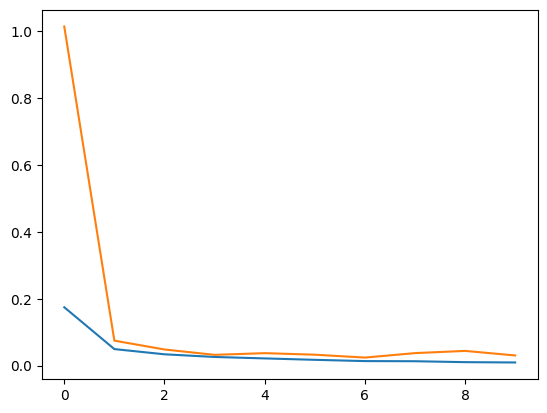

In [145]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255
x_test = x_test.reshape((-1,28,28,1)).astype('float32') / 255

model = keras.Sequential([
    #normalization
    keras.layers.Conv2D(32,kernel_size=(3,3), input_shape=[28,28,1]),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(32,kernel_size=(3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),


    keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid',activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu',  ),
    keras.layers.Dense(128,activation='relu',  ),
    keras.layers.Dense(10,activation='softmax',)

])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

hist = model.fit(x_train,y_train,batch_size=256,epochs=10, validation_data=(x_test,y_test))

pre = model.predict(x_test)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

